In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout, Activation
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
drive.mount('/content/drive',force_remount=True)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train=train_datagen.flow_from_directory('/content/drive/MyDrive/foodtrian/trian',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')
test=train_datagen.flow_from_directory('/content/drive/MyDrive/foodtrian/test',
                                               target_size=(256,256),
                                               batch_size=32,
                                               class_mode ='categorical')

Mounted at /content/drive
Found 100 images belonging to 10 classes.
Found 30 images belonging to 10 classes.


In [13]:
# Dat ten cho cac classes
classes = ['cachien', 'canhchua', 'com', 'hap', 'lau', 'my', 'nuong', 'thitchien', 'thitkho', 'xao']

In [14]:
model=Sequential()
#model CNN

# input
model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# 1
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 2
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# 3
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))
# output
model.add(Flatten())
model.add(Dense(128,activation='relu',kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation='Softmax'))

from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

opt = SGD(lr = 0.01, momentum = 0.9)
model.compile(optimizer = 'adam', loss ='categorical_crossentropy',metrics = ['accuracy'])
callbacks=[EarlyStopping(monitor='val_loss',patience=100)]

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [15]:
history=model.fit(train, steps_per_epoch=len(train), batch_size = 64, epochs=100, validation_data=test, validation_steps=len(test),
                  callbacks=callbacks,
                  verbose = 1)

Epoch 1/100
4/4 [==============================] - 4s 930ms/step - loss: 4.5144 - accuracy: 0.0900 - val_loss: 2.4884 - val_accuracy: 0.1000
Epoch 2/100
4/4 [==============================] - 2s 563ms/step - loss: 2.4045 - accuracy: 0.1000 - val_loss: 2.3341 - val_accuracy: 0.0333
Epoch 3/100
4/4 [==============================] - 2s 534ms/step - loss: 2.2888 - accuracy: 0.1200 - val_loss: 2.2605 - val_accuracy: 0.1333
Epoch 4/100
4/4 [==============================] - 2s 560ms/step - loss: 2.2434 - accuracy: 0.1600 - val_loss: 2.2023 - val_accuracy: 0.2000
Epoch 5/100
4/4 [==============================] - 2s 536ms/step - loss: 2.1521 - accuracy: 0.2600 - val_loss: 2.1289 - val_accuracy: 0.2000
Epoch 6/100
4/4 [==============================] - 2s 564ms/step - loss: 2.0410 - accuracy: 0.2000 - val_loss: 2.0593 - val_accuracy: 0.2333
Epoch 7/100
4/4 [==============================] - 2s 551ms/step - loss: 1.9079 - accuracy: 0.3000 - val_loss: 1.9018 - val_accuracy: 0.3333
Epoch 8/100
4

In [16]:
model.save('food_CNN.h5')

In [17]:
from keras.models import load_model
models = load_model('food_CNN.h5')

In [18]:
score = model.evaluate(test,verbose=1)
print('Test loss= ', score[0])
print('Test accuracy= ', score[1])

1/1 [==============================] - 1s 535ms/step - loss: 3.1449 - accuracy: 0.4667
Test loss=  3.1449263095855713
Test accuracy=  0.46666666865348816


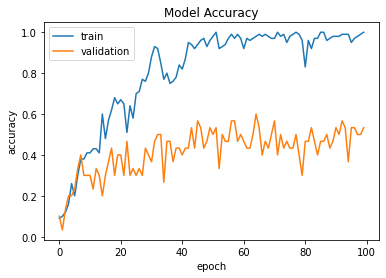

In [19]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')

com


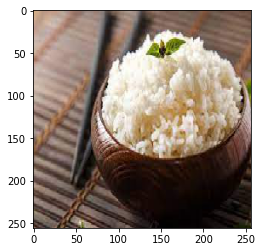

In [20]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/comm2.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])

nuong


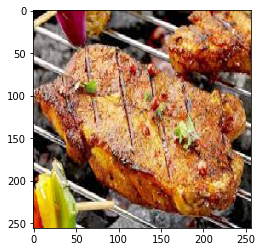

In [21]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/nn5.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])

thitchien


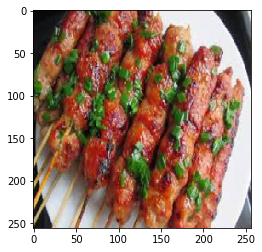

In [23]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/nn6.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])

xao


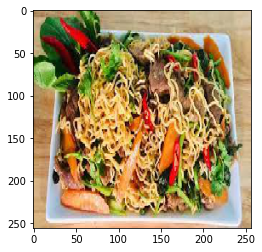

In [24]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img = load_img('/content/myy.jpg',target_size=(256,256))
plt.imshow(img)
img = img_to_array(img)
img=img.reshape(1,256,256,3)
img=img.astype('float32')
img = img/255
print(classes[np.argmax(model.predict(img))])